# Nek5000 with Different CG algorithms

## Imports and helper function to read data

In [5]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def readdata(fname, nelts=5, nx1s=18, nsamples=5):
    mean = np.zeros(nx1s)
    std = np.zeros(nx1s)
    nsample = np.zeros(nx1s)
    
    file = open(fname, 'r')
    
    for nx1 in range(nx1s):
            tlist = []
            for j in range(nsamples):
                s = file.readline()
                tlist.append(float(s.split()[-1]))
            mean[nx1] = np.mean(tlist)
            std[nx1] = np.std(tlist)
            nsample[nx1] = (100*1.96*std[nx1]/(5*mean[nx1]))**2
        
    return mean, std, nsample

def cglabel(cg):
    if cg == 'CGGOO':
        return 'standard - cggo'
    elif cg == 'CGGOV':
        return 'vector - cggov'
    elif cg == 'CGGOS':
        return 'serial - cggos'
    elif cg == 'CGGOD':
        return 'DG - cggo_dg'

## Set a few variable values

In [7]:
minnx1 = 3
maxnx1 = 20
nx1s = maxnx1 - minnx1 + 1
nelts = 5
nprocs = 7
machine = ['DQ']
cggo = ['CGGOS', 'CGGOV', 'CGGOD', 'CGGOO']

## Plots:

/Users/thilina/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


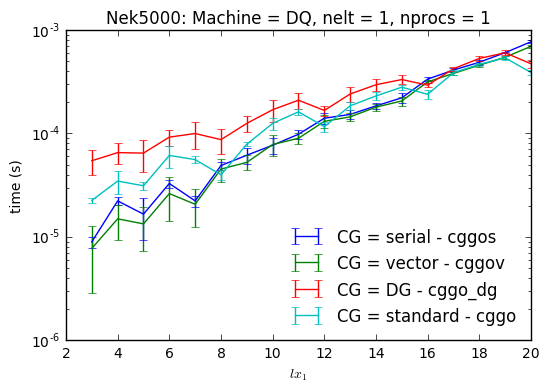

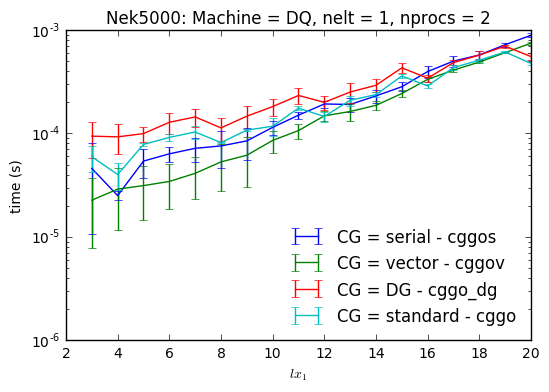

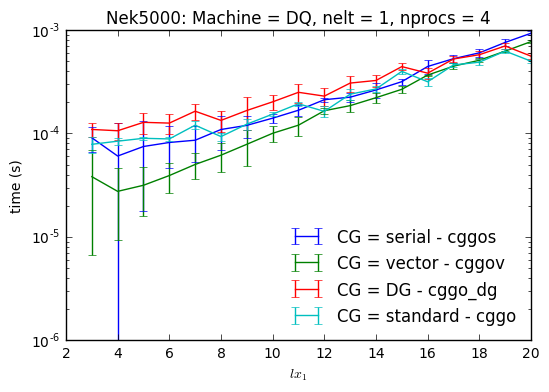

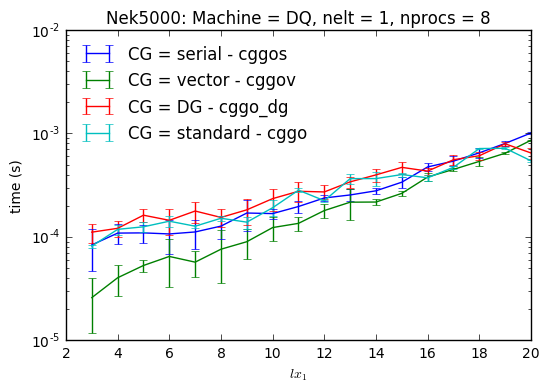

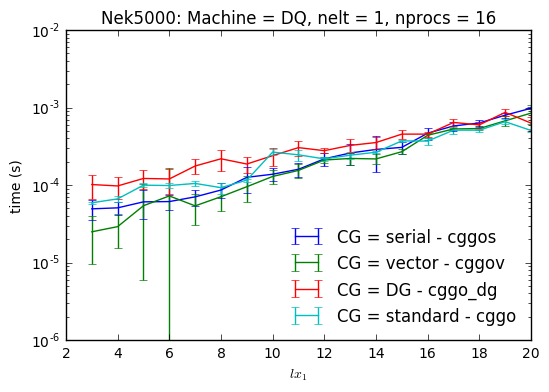

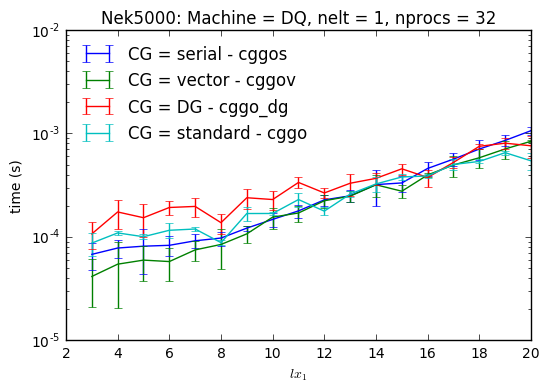

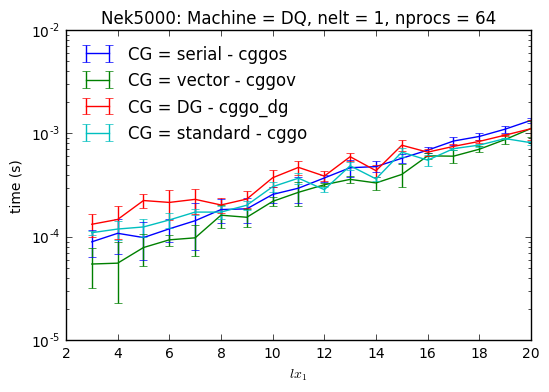

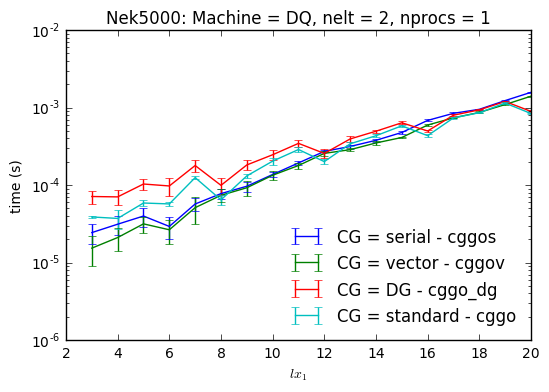

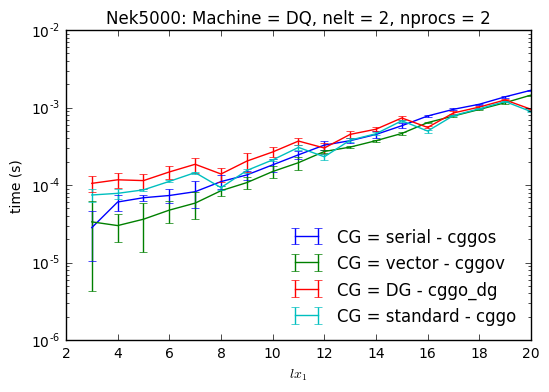

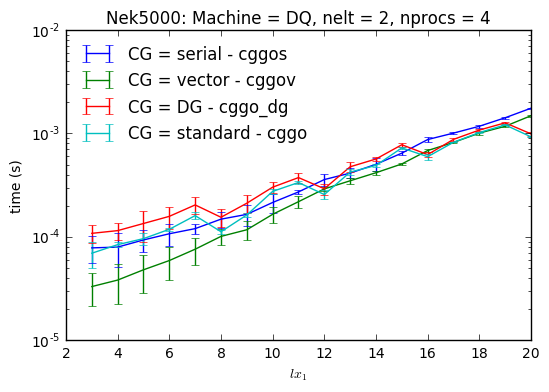

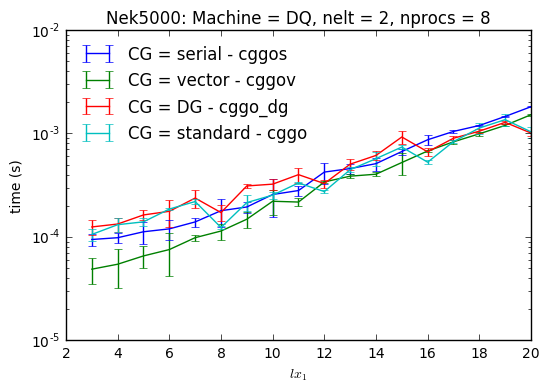

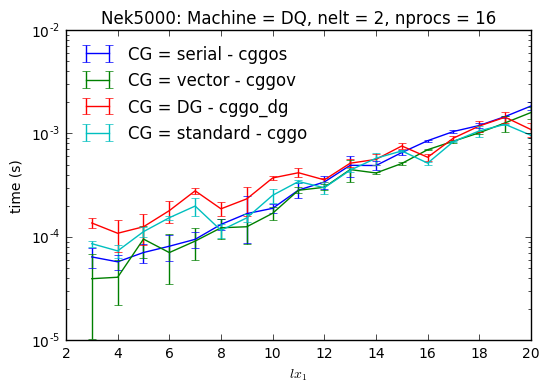

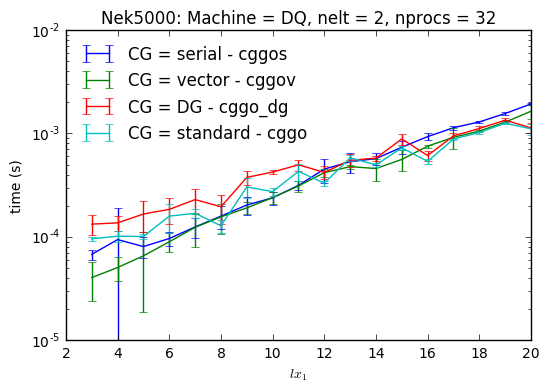

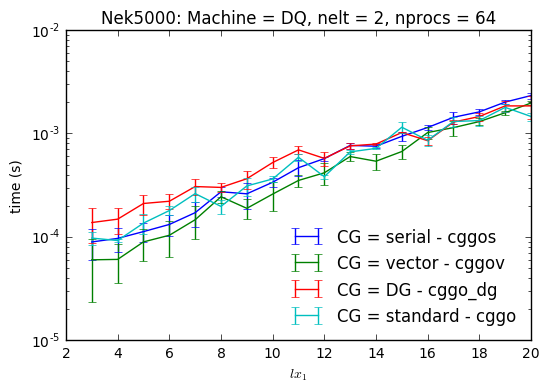

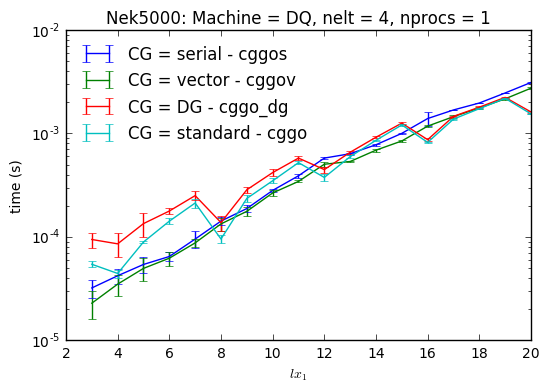

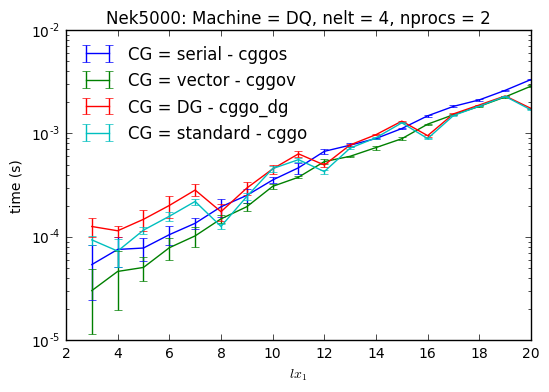

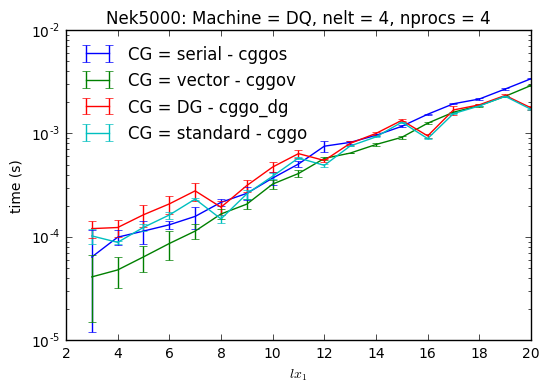

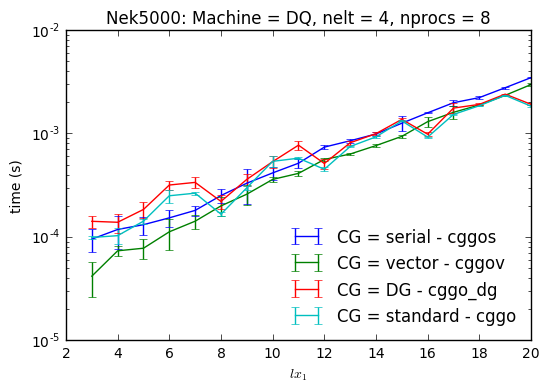

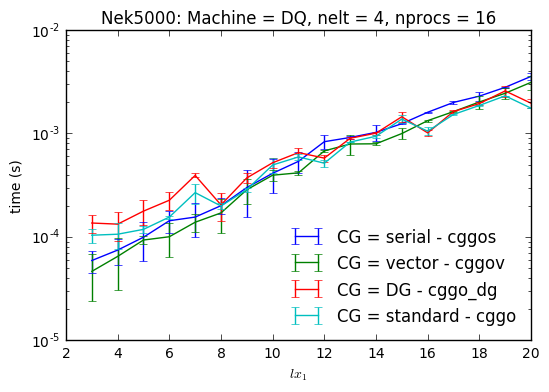

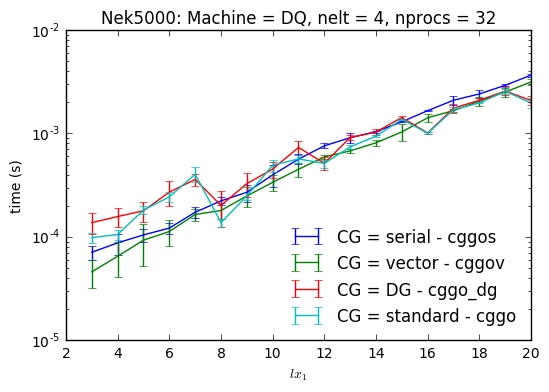

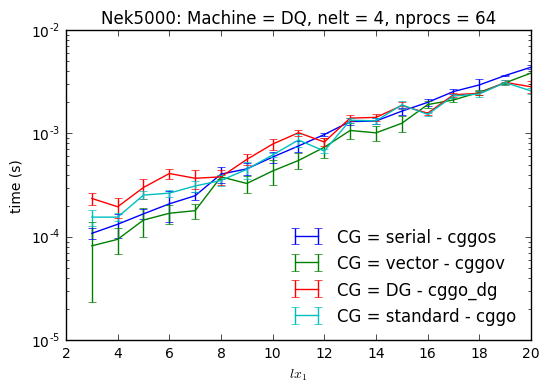

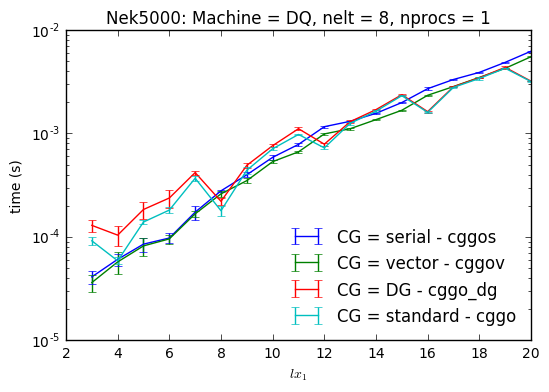

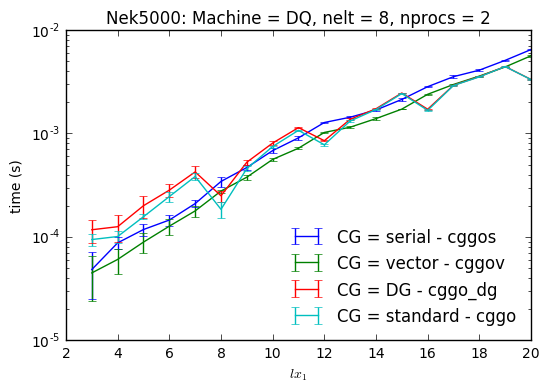

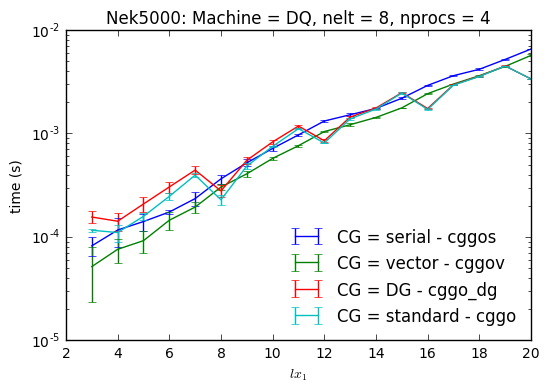

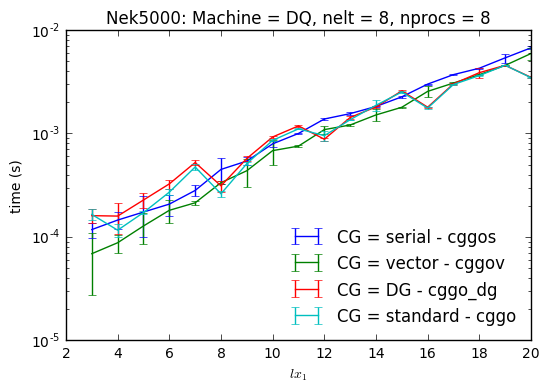

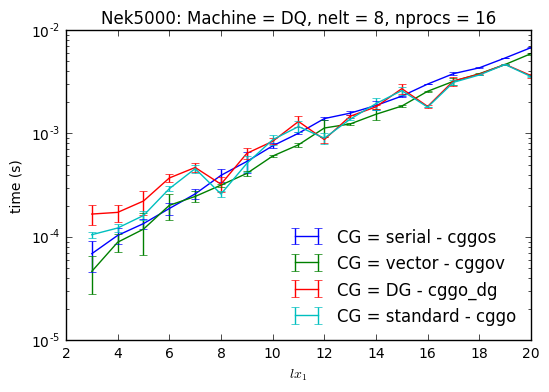

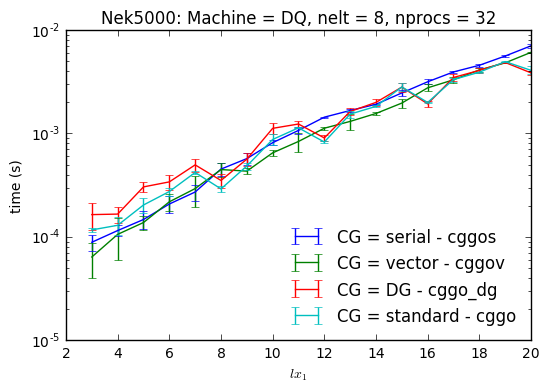

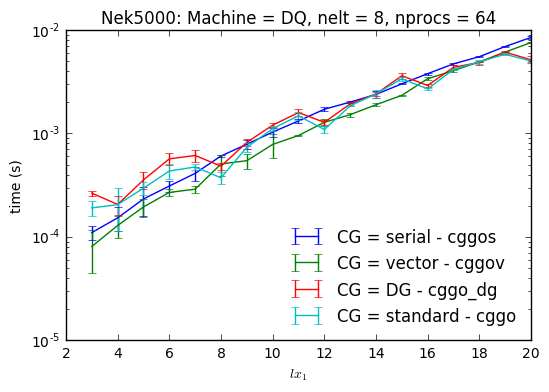

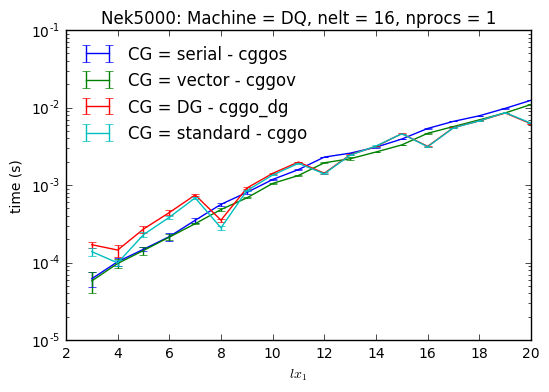

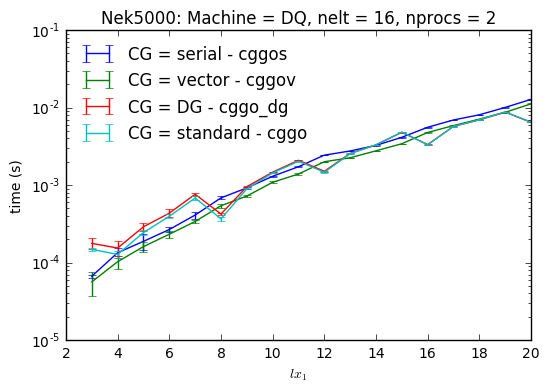

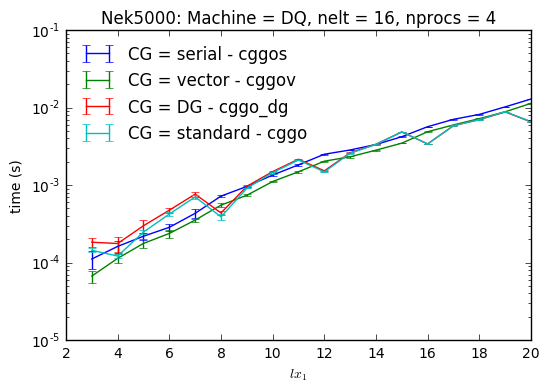

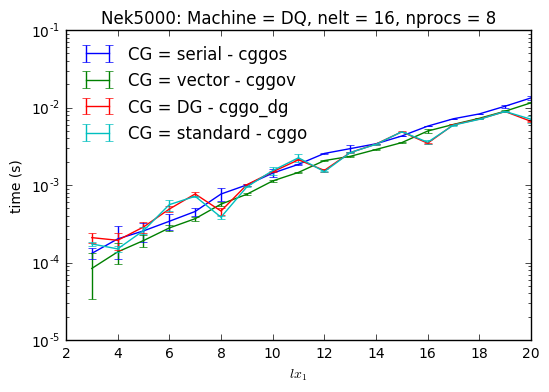

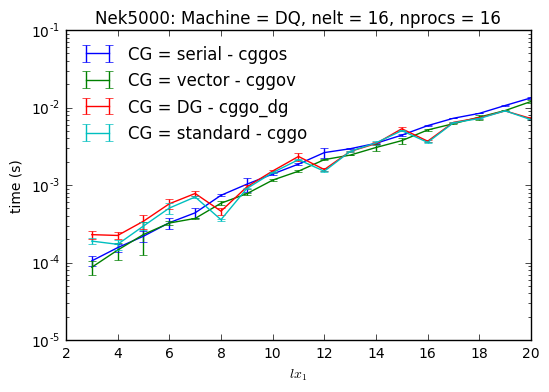

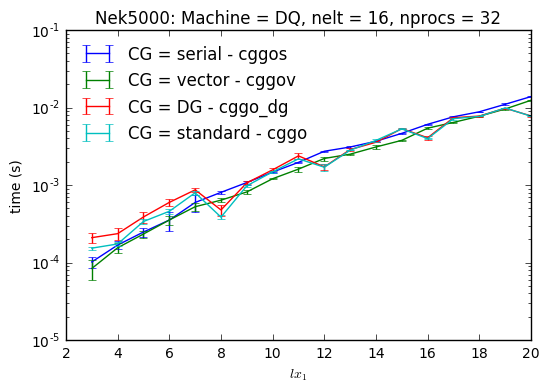

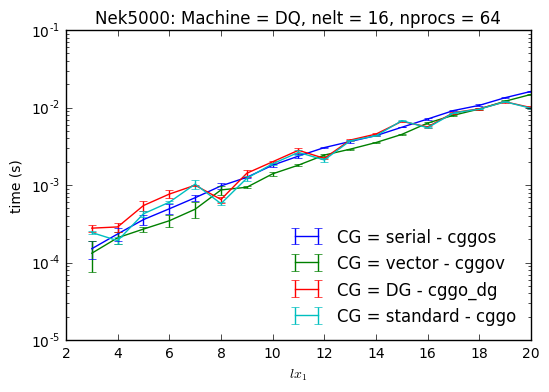

In [8]:
for m in machine:
    for n in range(nelts):
        for p in range(nprocs):
            plt.figure()
            for cg in cggo:
                fname = m + '%02d' % (2**n) + 'P' + '%05d' % (2**p) + cg

                meanNek5000, stdNek5000, nsampleNek5000 = readdata('data/' + fname,
                                                            nelts = nelts, nx1s = nx1s)

                plt.title('Nek5000: Machine = ' + m + ', nelt = %d'%(2**n) + 
                                                                  ', nprocs = %d'%(2**p))
                if (cg in cggo[:2]):
                    meanNek5000 = meanNek5000/3
                plt.errorbar([i for i in range(minnx1, maxnx1+1)], meanNek5000, 
                             stdNek5000, label='CG = ' + cglabel(cg))
                plt.xlabel(r'$lx_1$')
                plt.ylabel('time (s)')
                plt.yscale('log')
                plt.legend(frameon=False, loc=0)